In [1]:
%matplotlib inline
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as np
import sys
import matplotlib

matplotlib.style.use('ggplot')
matplotlib.rcParams.update({'font.size': 22})
matplotlib.rcParams.update({'figure.autolayout': True})

import ipywidgets as widgets
from IPython.display import display, clear_output

import plotly.plotly as py
from plotly.graph_objs import *
import plotly
import plotly.graph_objs as go

from plotly.widgets import GraphWidget
import cufflinks as cf
cf.set_config_file(theme='ggplot')

/home/jennifer/anaconda2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning:

The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.

/home/jennifer/anaconda2/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning:

IPython.utils.traitlets has moved to a top-level traitlets package.



<IPython.core.display.Javascript object>

In [2]:
#%%bash
#bedtools coverage -a /home/biolinux/Escritorio/exons.bed -b 60632_S2.bam -d -split > exon_60632.txt

In [3]:
#df = pd.read_table('exon_60632.txt', names = ["chr", "Start", "End", "Exon", "Pos_exon","Cov"])

In [4]:
x =  pd.read_table('prueba.txt')

In [5]:
df = x[["chr", "Start", "End", "Exon", "Pos_exon","Cov","Cov2"]]

In [6]:
#df2 = pd.read_table('59440_conteo.txt', names = ["chr", "Start", "End", "Exon","Cov"])


In [7]:
#df2.head()

In [8]:
df1 = pd.read_csv('genes')

In [9]:
#a = df1.columns.get_values()
#a

In [10]:
#genes = a.tolist()
#genes

In [11]:
genes = df1['genes'].tolist()

In [12]:
genes

['ABCA3', 'CSF2RA', 'CSF2RB', 'SFTPA1', 'SFTPB']

In [13]:
#genes = ['BMP1','COL1A1','COL1A2','CRTAP','FKBP10','IFITM5','LAMB3','LEPRE1','PPIB','SERPINF1','SERPINH1','SP7']
genes_ = '_,'.join(map(str, genes))

In [14]:
#genes_

In [15]:
g = genes_.split(',')

In [16]:
#g

In [17]:
#len(g)

In [18]:
g[-1] = 'SFTPD_'

In [19]:
g = [x.strip(' ') for x in g]
#g

In [20]:
todos = df[df['Exon'].str.contains('|'.join(g))]

In [21]:
#todos

In [22]:
todos['Cov2'] = todos['Cov'].astype(bool)

In [23]:
todos['Cov2'] = todos['Cov2'].astype(int)

In [24]:
#todos.to_csv('prueba.txt', sep ='\t')

In [25]:
text = widgets.Text(description="Gen:")
display(text)

def ingreso(sender):
    print(text.value)
    
t = text.on_submit(ingreso)

The installed widget Javascript is the wrong version. It must satisfy the semver range ~2.1.4.


ABCA3.
ABCA3


In [36]:
len(genes)

5

In [44]:
str(text.value)

'ABCA3'

In [45]:
t = str(text.value)

In [46]:
gen ='^'+t + '_'
gen

'^ABCA3_'

In [47]:
def grafico_media():
    x = todos[todos['Exon'].str.contains(gen)]
    x1 = x[['Cov','Exon']].groupby('Exon').mean()
    x2 = x1.sort_values('Cov', ascending= True)
    plot = x2.plot(kind="bar",figsize=(20, 10), title = t , color = [('#41b9e1')]);plt.axhline(30, color='k');
    fig = plot.get_figure()
    fig.savefig(gen+".png", bbox_inches=0)
    return x2

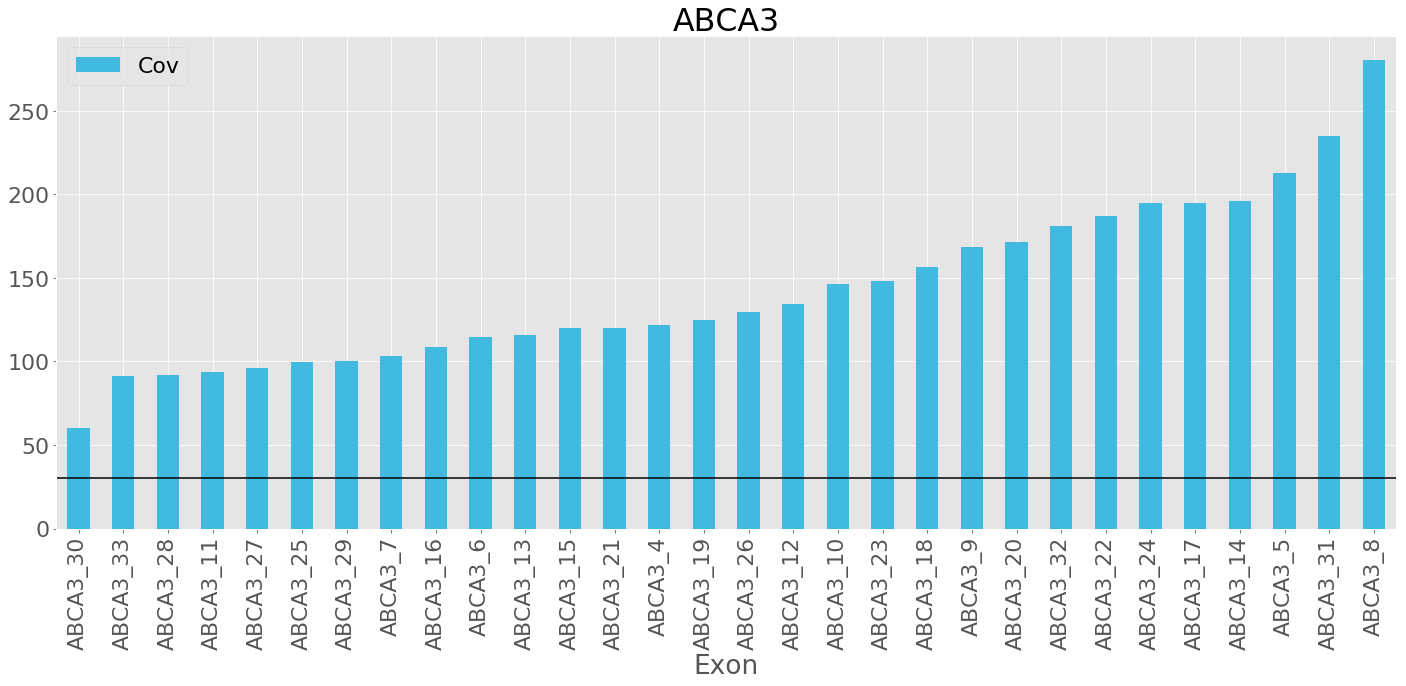

In [50]:
j = grafico_media()

In [51]:
cf.set_config_file(offline=False, world_readable=True, theme='ggplot')
j.iplot(kind='bar',color = [('#41b9e1')], yTitle='Número de lecturas', xTitle='Exón')

In [52]:
def porcentaje_cobertura():
    s = todos[todos['Exon'].str.contains(gen)]
    s_1 = s[['Cov2','Exon']].groupby('Exon').mean()*100
    y1 = s_1.sort_values('Cov2', ascending= True)
    plot = y1.plot(kind="bar",figsize=(20, 10), title = t ,color = [('#6633FF')],);plt.axhline(100, color='r');
    fig = plot.get_figure()
    plot.set(xlabel="Exon", ylabel="Porcentaje de Cobertura")
    fig.savefig(gen + "AP.png", bbox_inches=0)
    return y1

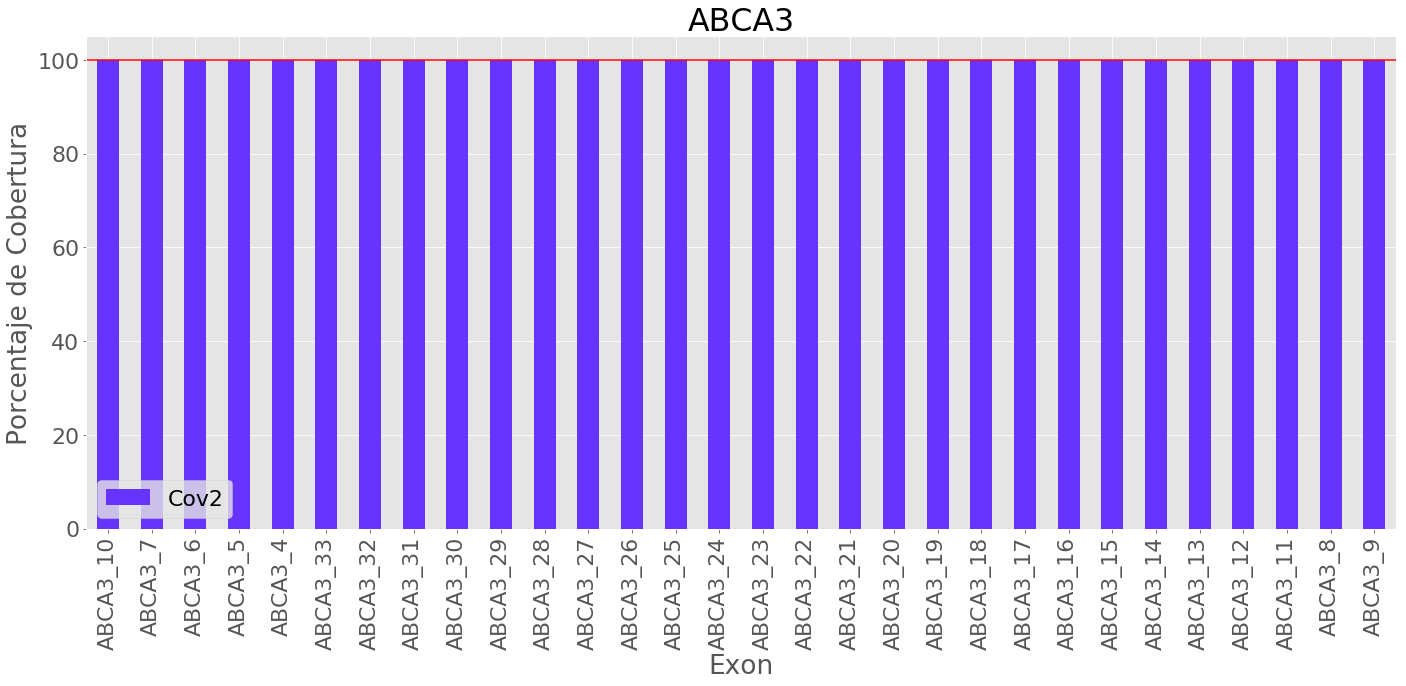

In [53]:
r = porcentaje_cobertura()

In [54]:
cf.set_config_file(offline=False, world_readable=True, theme='ggplot')
r.iplot(kind='bar',color = [('#4B088A')], yTitle='Porcentaje de cobertura', xTitle='Exón')

In [55]:
text = widgets.Text(description="Exon:")
display(text)

def exon(sender):
    print(text.value)
    
e = text.on_submit(exon)

The installed widget Javascript is the wrong version. It must satisfy the semver range ~2.1.4.


CSF2RA_3_chrX'
CSF2RA_3_chrX


In [69]:
exon = str(text.value)

In [70]:
exon

'CSF2RA_3_chrX'

In [76]:
def profundidad():
    z = todos[todos['Exon'].str.contains('(?:\\s|^)'+exon+'(?:\\s|$)')]
    plt.figure(figsize=(20,10))
    z.plot(kind='area', x='Pos_exon', y='Cov',figsize=(20, 10),title = exon ,color = [('#088A08')]);plt.axhline(10, color='r');plt.axhline(30, color='k')
    plt.savefig('CSF2A2_X.png')
    return z

In [ ]:
#CSF5A2_4.head()

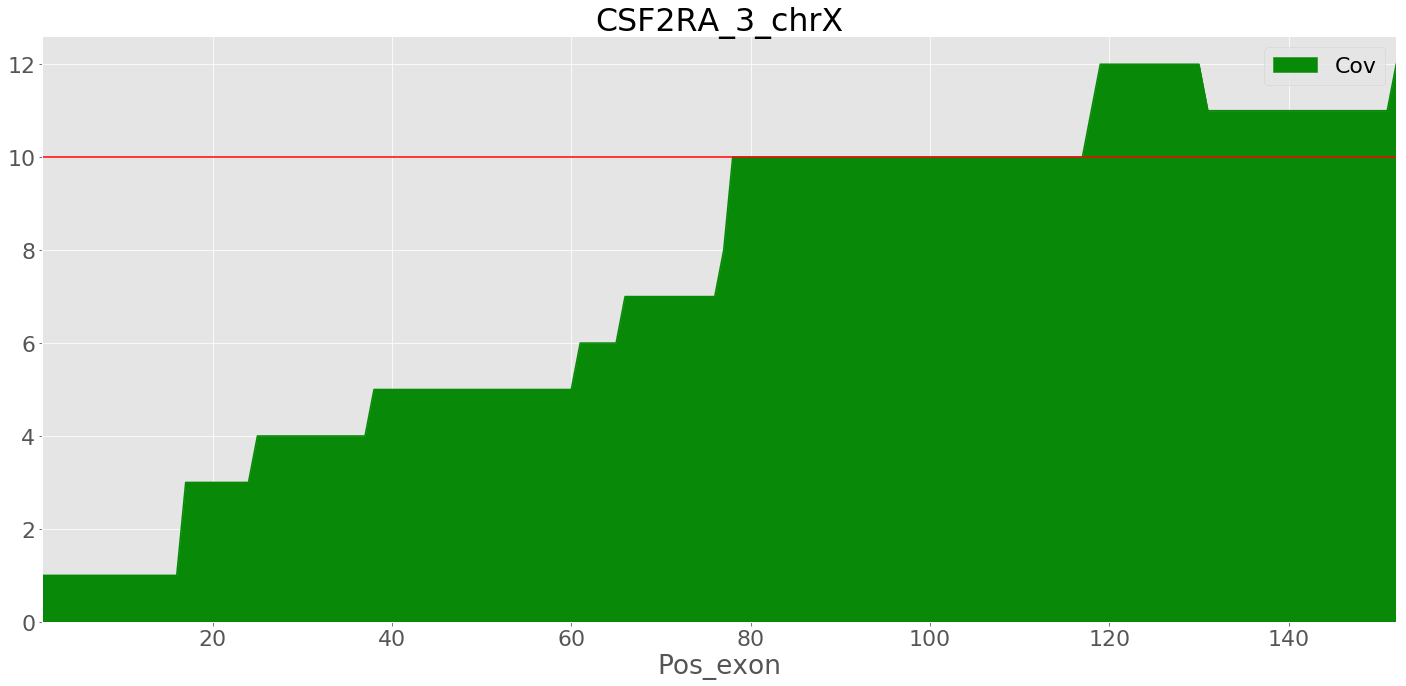

In [77]:
m = profundidad()

In [83]:
d = m['Pos_exon'].tolist()
d1 = m['Cov'].tolist()

import plotly.graph_objs as go
trace1 = go.Scatter(
    x = d, 
    y = d1,
    fill='tozeroy',
    line=dict(
        color='rgb(63, 191, 63)',
    )    
)
data = [trace1] 
layout = go.Layout(
    title=exon,
    xaxis=dict(
        title='Posición en el exon',
        titlefont=dict(
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Número de lecturas',
        titlefont=dict(
            size=18,
            color='#7f7f7f'
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic-area')